## THIS PROJECT IS A DIABETES DETECTOR WHICH PREDICTS WHETHER A PERSON HAS DIABETES OR NOT BASED ON THE PREVIOUS DIABETES RECORDS.
## I HAVE DESIGNED MY MACHINE LEARNING MODEL USING LOGISTIC REGRESSION

In [20]:
import numpy as np, pandas as pd,seaborn as sns, matplotlib.pyplot as plt,pickle as pk
%matplotlib inline

### THE DATA THAT I HAVE USED IS THE DIABETES.CSV FROM KAGGLE
### link:https://www.kaggle.com/code/ahmetcankaraolan/diabetes-prediction-using-machine-learning/data

### DATA EXPLANATION
### 1) Pregnancies- Denotes the number of pregnancies the patient had.
### 2) Glucose- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
### 3) BloodPressure-Diastolic blood pressure (mm Hg)
### 4) SkinThickness- Triceps skin fold thickness (mm)
### 5) Insulin- 2-Hour serum insulin (mu U/ml)
### 6) BMI -Body mass index (weight in kg/(height in m)^2)
### 7) DiabetesPedigreeFunction- Values of study of whether the subject's family members had Diabetes.
### 8) Age- Age(years)
### 9) Outcome -->1(If had Diabetes),  -->0(If don't)

In [9]:
df=pd.read_csv("./diabetes-dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [42]:
max(df['DiabetesPedigreeFunction'])

2.42

## EXPLORATARY DATA ANALYSIS

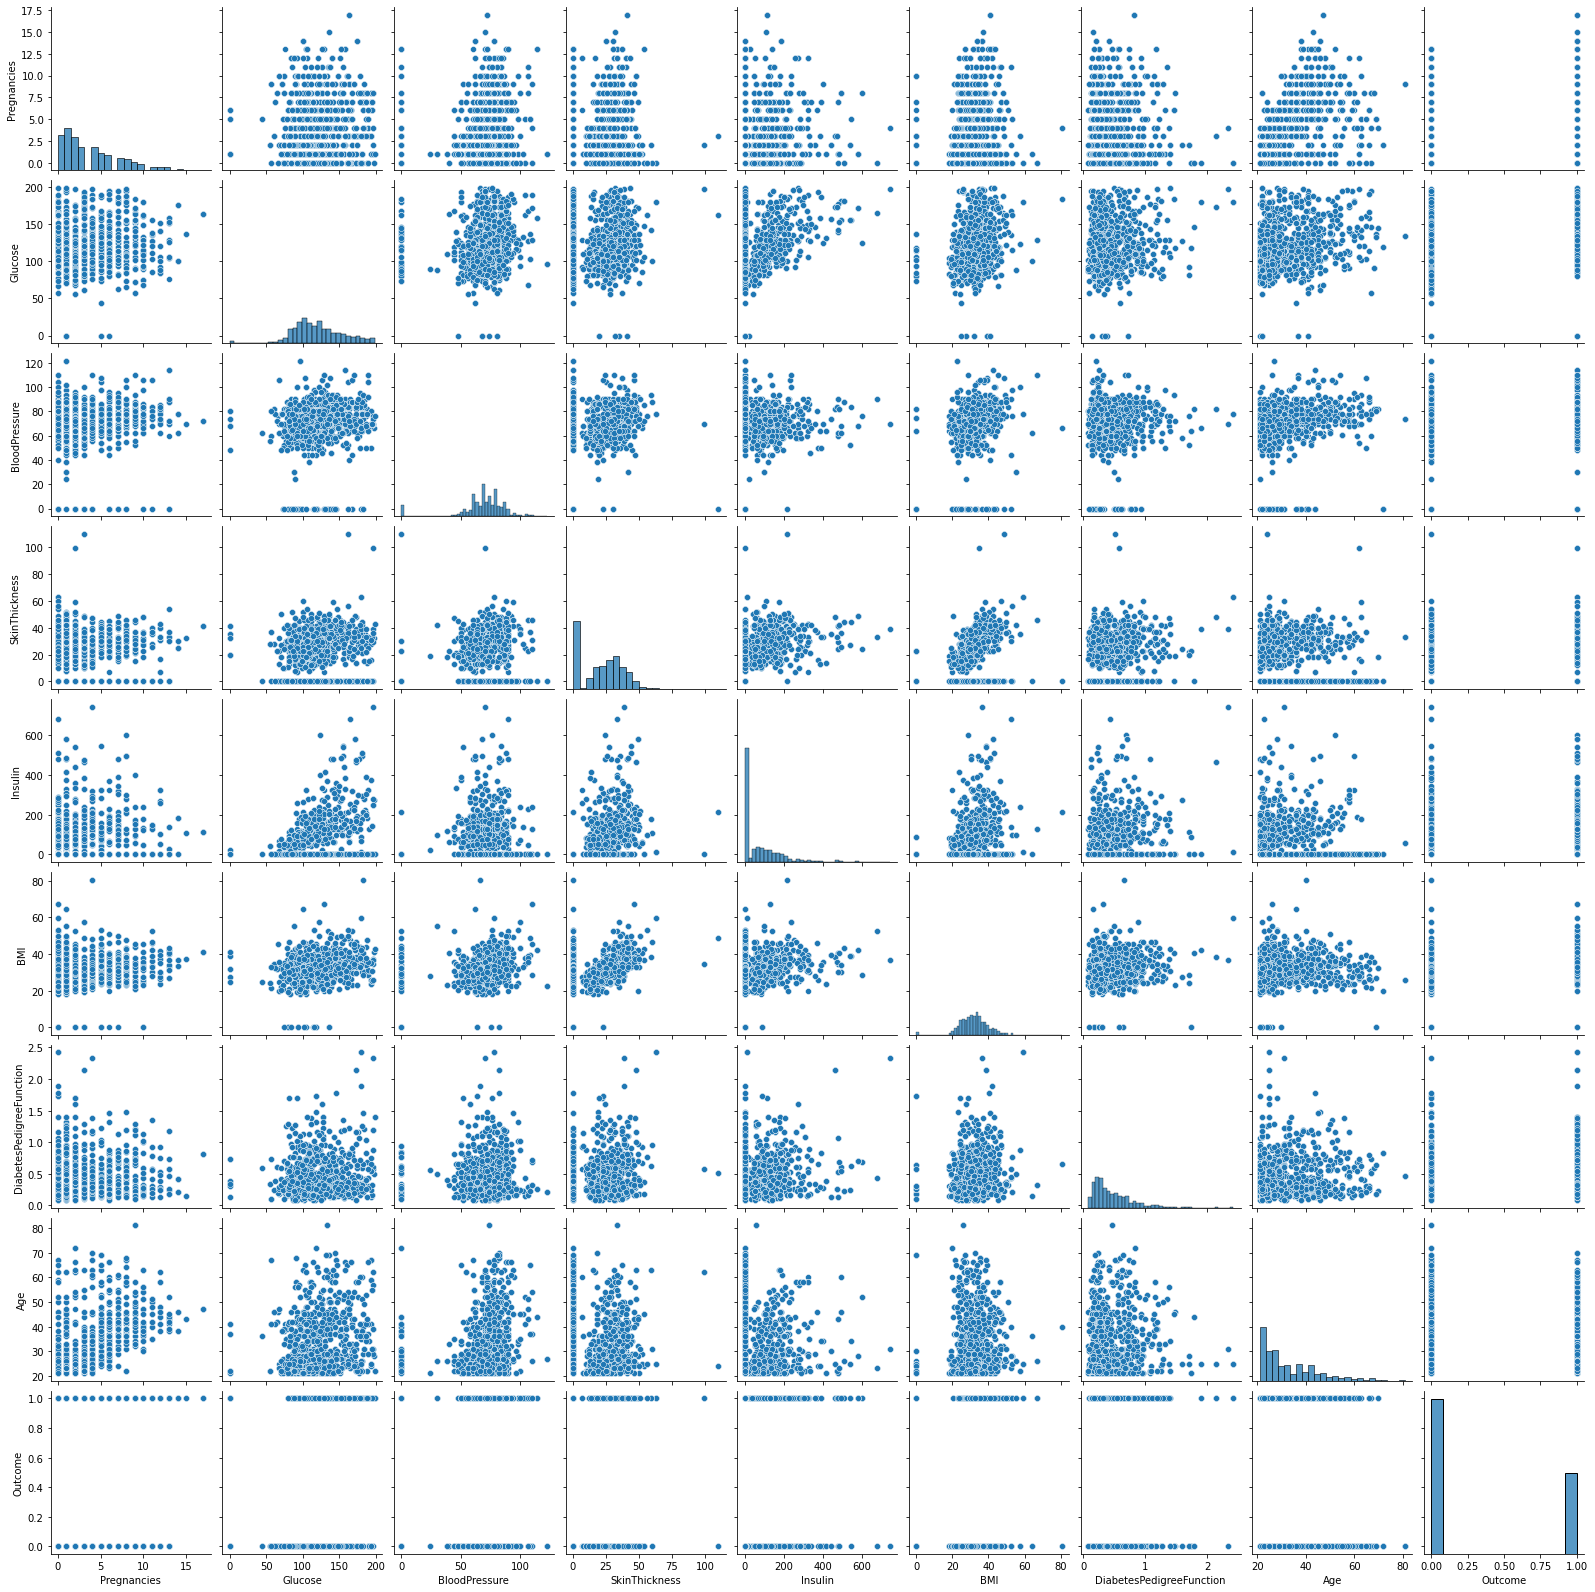

In [10]:
sns.pairplot(df)

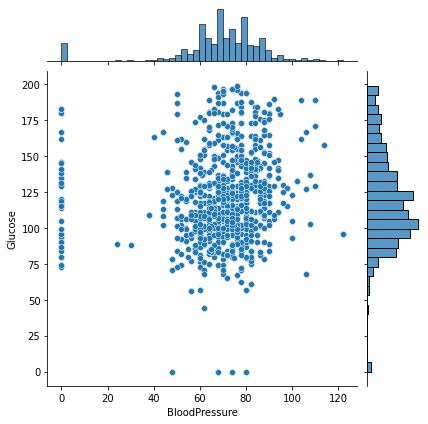

In [11]:
sns.jointplot(x='BloodPressure',y='Glucose',data=df)

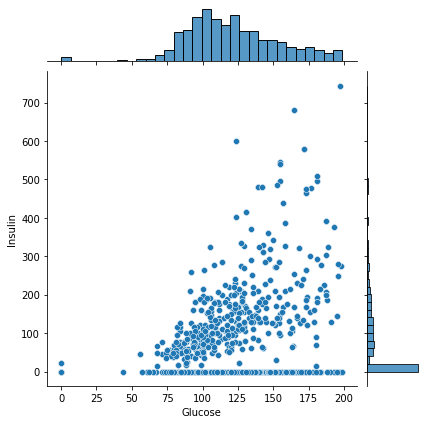

In [12]:
sns.jointplot(x='Glucose',y='Insulin',data=df)

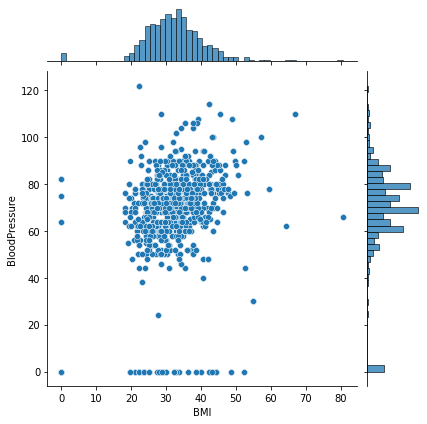

In [13]:
sns.jointplot(x='BMI',y='BloodPressure',data=df)

### REMOVING UNECESSARY VARIABLES

In [14]:
df.drop('Pregnancies',axis=1,inplace=True)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,138,62,35,0,33.6,0.127,47,1
1,84,82,31,125,38.2,0.233,23,0
2,145,0,0,0,44.2,0.630,31,1
3,135,68,42,250,42.3,0.365,24,1
4,139,62,41,480,40.7,0.536,21,0


### PREPARING DATA FOR MACHINE LEARNING MODEL

In [15]:
x=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

## TRAIN_TEST_SPLIT

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,stratify=y,random_state=50)

## TRAINING THE MODEL

In [17]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
file_name='finalized.sav'
pk.dump(model,open(file_name,''))

LogisticRegression()

## DRAWING PREDICTIONS FROM THE MODEL

In [18]:
pred=model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred))
print("\n")
print(confusion_matrix(y_test,pred))
print(accuracy_score(pred,y_test)*100)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       461
           1       0.77      0.53      0.63       239

    accuracy                           0.79       700
   macro avg       0.78      0.72      0.74       700
weighted avg       0.78      0.79      0.77       700



[[424  37]
 [113 126]]
78.57142857142857


## TESTING MODEL'S OUTCOME BY PROVIDING SOME TEST DATA

In [19]:
test_case=np.array([138,62,35,0,33.6,0.127,47])
test_case=test_case.reshape(1,-1)
test_case=pd.DataFrame(data=test_case,columns=x.columns)
pred=model.predict(test_case)
if pred==0:
    print("You don't have Diabeties")
elif pred==1:
    print("You have Diabeties")

You have Diabeties
